# Consumption Smoothing

## Overview

In this lecture, we’ll study a famous model of the “consumption function” that Milton Friedman and Robert Hall  proposed to fit some empirical data patterns.

We’ll study a model that is often called the “consumption-smoothing model” and we will do so using  matrix multiplication and matrix inversion, the same tools that we used in the previous lecture.


The formulas presented in  Lecture 13 are at the core of the consumption smoothing model because we will use them to define a consumer’s “human wealth”.

The  key idea that inspired Milton Friedman was that a person’s non-financial income, i.e., his or
her wages from working, could be viewed as a dividend stream from that person’s ‘‘human capital’’
and that standard asset-pricing formulas could be applied to compute a person’s
‘‘non-financial wealth’’ that capitalizes the  earnings stream.

## Analysis

As usual, we’ll start by importing some Python modules.

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from collections import namedtuple

The model describes  a consumer who lives from time $ t=0, 1, \ldots, T $, receives a stream $ \{y_t\}_{t=0}^T $ of non-financial income and chooses a consumption stream $ \{c_t\}_{t=0}^T $.

We usually think of the non-financial income stream as coming from the person’s salary from supplying labor.

The model  takes a non-financial income stream as an input, regarding it as “exogenous” in the sense of not being determined by the model.

The consumer faces a gross interest rate of $ R >1 $ that is constant over time, at which she is free to borrow or lend, up to  limits that we’ll describe below.

To set up the model, let

- $ T \geq 2 $  be a positive integer that constitutes a time-horizon.  
- $ y = \{y_t\}_{t=0}^T $ be an exogenous  sequence of non-negative non-financial incomes $ y_t $.  
- $ a = \{a_t\}_{t=0}^{T+1} $ be a sequence of financial wealth.  
- $ c = \{c_t\}_{t=0}^T $ be a sequence of non-negative consumption rates.  
- $ R \geq 1 $ be a fixed gross one period rate of return on financial assets.  
- $ \beta \in (0,1) $ be a fixed discount factor.  
- $ a_0 $ be a given initial level of financial assets  
- $ a_{T+1} \geq 0 $  be a terminal condition on final assets.  


The sequence of financial wealth $ a $ is to be determined by the model.

We require it to satisfy  two  **boundary conditions**:

- it must  equal an exogenous value  $ a_0 $ at time $ 0 $  
- it must equal or exceed an exogenous value  $ a_{T+1} $ at time $ T+1 $.  


The **terminal condition** $ a_{T+1} \geq 0 $ requires that the consumer does not leave the model in debt.

A utility maximizing consumer won’t want to die leaving positive assets, so she’ll arrange her affairs to make
$ a_{T+1} = 0 $.

The consumer faces a sequence of budget constraints that  constrains   sequences $ (y, c, a) $


<a id='equation-eq-a-t'></a>
$$
a_{t+1} = R (a_t+ y_t - c_t), \quad t =0, 1, \ldots T \tag{1}
$$

*assets in next period is aseets period 1 +income-consumption*

Equations [(1)](#equation-eq-a-t) constitute  $ T+1 $ such budget constraints, one for each $ t=0, 1, \ldots, T $.

Given a sequence $ y $ of non-financial incomes, a large  set of pairs $ (a, c) $ of (financial wealth, consumption) sequences  satisfy the sequence of budget constraints [(1)](#equation-eq-a-t).

Our model has the following logical flow.

- start with an exogenous non-financial income sequence $ y $, an initial financial wealth $ a_0 $, and
  a candidate consumption path $ c $.  
- use the system of equations [(1)](#equation-eq-a-t) for $ t=0, \ldots, T $ to compute a path $ a $ of financial wealth  
- verify that $ a_{T+1} $ satisfies the terminal wealth constraint $ a_{T+1} \geq 0 $.  
  - If it does, declare that the candidate path is **budget feasible**.  
  - if the candidate consumption path is not budget feasible, propose a less greedy consumption  path and start over  


Below, we’ll describe how to execute these steps using linear algebra – matrix inversion and multiplication.

The above procedure seems like a sensible way to find “budget-feasible” consumption paths $ c $, i.e., paths that are consistent
with the exogenous non-financial income stream $ y $, the initial financial  asset level $ a_0 $, and the terminal asset level $ a_{T+1} $.

In general, there are **many** budget feasible consumption paths $ c $.

Among all budget-feasible consumption paths, which one should a consumer want?

To answer this question, we evaluate alternative budget feasible consumption paths $ c $ using the following utility functional or **welfare criterion**:

*expected discounted lifetime utility*


<a id='equation-welfare'></a>
$$
W = \sum_{t=0}^T \beta^t (g_1 c_t - \frac{g_2}{2} c_t^2 ) \tag{2}
$$

where $ g_1 > 0, g_2 > 0 $.

When $ \beta R \approx 1 $, the fact that the utility function $ g_1 c_t - \frac{g_2}{2} c_t^2 $ has diminishing marginal utility imparts a preference for consumption that is very smooth (the consumer is risk averse).

*for one period graph u is inc but concave*

Indeed, we shall see that when $ \beta R = 1 $ (a condition assumed by Milton Friedman and Robert Hall),  criterion [(2)](#equation-welfare) assigns higher welfare to smoother consumption paths.

By **smoother** we mean as close as possible to being constant over time., *consumption same in every period*



The preference for smooth consumption paths that is built into the model gives it the  name “consumption smoothing model”.

Let’s dive in and do some calculations that will help us understand how the model works.

Here we use default parameters $ R = 1.05 $, $ g_1 = 1 $, $ g_2 = 1/2 $, and $ T = 65 $.

We create a Python **namedtuple** to store these parameters with default values.

*assumptions $\beta$ must be 1, if larger than 1 will save more*

In [11]:
ConsumptionSmoothing = namedtuple("ConsumptionSmoothing", 
                        ["R", "g1", "g2", "β_seq", "T"])

def create_consumption_smoothing_model(R=1.05, g1=1, g2=1/2, T=65):
    β = 1/R
    β_seq = np.array([β**i for i in range(T+1)])
    return ConsumptionSmoothing(R, g1, g2, 
                                β_seq, T)

## Friedman-Hall consumption-smoothing model

A key object is what Milton Friedman called “human” or “non-financial” wealth at time $ 0 $:

$$
h_0 \equiv \sum_{t=0}^T R^{-t} y_t = \begin{bmatrix} 1 & R^{-1} & \cdots & R^{-T} \end{bmatrix}
\begin{bmatrix} y_0 \cr y_1  \cr \vdots \cr y_T \end{bmatrix}
$$

*discount of future human streams and sum them up, $R^{-t}$ is the same as $\beta^t$* 

Human or non-financial wealth  at time $ 0 $ is evidently just the present value of the consumer’s non-financial income stream $ y $.

Formally it very much resembles the asset price that we computed in lecture 13.

Indeed, this is why Milton Friedman called it “human capital”.

By iterating on equation [(1)](#equation-eq-a-t) and imposing the terminal condition

$$
a_{T+1} = 0,
$$

it is possible to convert a sequence of budget constraints [(1)](#equation-eq-a-t) into a single intertemporal constraint

*if start with period 0 lay out formula assets+income-con and then solve period 1 and plut back in until end of T .... get to ^(t+1)... = $a_0+y_0+c_0$. Thus removing $a_1,a_2,...$ so only need $a_t =0$ and $a_0$ to solve*

*then moving $a_0$ over and $c$ over then the sum of Ry+sum Rc =$a_0$*

*end up with sum of consumptions= human wealth + asset welth, consumption = resources born with and discounted resources get in lifetime*

<a id='equation-eq-budget-intertemp'></a>
$$
\sum_{t=0}^T R^{-t} c_t = a_0 + h_0. \tag{3}
$$

Equation [(3)](#equation-eq-budget-intertemp)  says that the present value of the consumption stream equals the sum of finanical and non-financial (or human) wealth.

Robert Hall showed that when $ \beta R = 1 $, a condition Milton Friedman had also  assumed, it is “optimal” for a consumer to smooth consumption by setting,, also consuming the same amount in every period 

$$
c_t = c_0 \quad t =0, 1, \ldots, T
$$

(Later we’ll see why this constant path maximizes
criterion [(2)](#equation-welfare) when $ \beta R =1 $.)

In this case, we can use the intertemporal budget constraint to write


<a id='equation-eq-conssmoothing'></a>
$$
c_t = c_0  = \left(\sum_{t=0}^T R^{-t}\right)^{-1} (a_0 + h_0), \quad t= 0, 1, \ldots, T. \tag{4}
$$

Equation [(4)](#equation-eq-conssmoothing) is the consumption-smoothing model in a nutshell. removing c from the sum bc it is constant


## Mechanics of Consumption smoothing model

As promised, we’ll see step-by-step instructions on how to use linear algebra, readily implemented in Python, to compute all  objects in play in  the consumption-smoothing model.

In the calculations below,  we’ll  set default values of  $ R > 1 $, e.g., $ R = 1.05 $, and $ \beta = R^{-1} $.

### Step 1

For a $ (T+1) \times 1 $  vector $ y $, use matrix algebra to compute $ h_0 $

$$
h_0 = \sum_{t=0}^T R^{-t} y_t = \begin{bmatrix} 1 & R^{-1} & \cdots & R^{-T} \end{bmatrix}
\begin{bmatrix} y_0 \cr y_1  \cr \vdots \cr y_T \end{bmatrix}
$$

### Step 2

Compute time $ 0 $   consumption $ c_0 $ :

$$
c_t = c_0 = \left( \frac{1 - R^{-1}}{1 - R^{-(T+1)}} \right) (a_0 + \sum_{t=0}^T R^{-t} y_t ) , \quad t = 0, 1, \ldots, T
$$

where we used the formula for the sum of the first $n$ terms of a [geometric series](https://en.wikipedia.org/wiki/Geometric_series):

$$\sum\limits_{k=0}^{n-1}r^k = \left( \frac{1-r^n}{1-r}\right).$$

In our example, $k=t$, $r=\frac{1}{R}$ and $n = T+1$.


### Step 3

Use  the system of equations [(1)](#equation-eq-a-t) for $ t=0, \ldots, T $ to compute a path $ a $ of financial wealth.

To do this, we translate that system of difference equations into a single matrix equation as follows:

$$
\begin{bmatrix} 
1 & 0 & 0 & \cdots & 0 & 0 & 0 \cr
-R & 1 & 0 & \cdots & 0 & 0 & 0 \cr
0 & -R & 1 & \cdots & 0 & 0 & 0 \cr
\vdots  &\vdots & \vdots & \cdots & \vdots & \vdots & \vdots \cr
0 & 0 & 0 & \cdots & -R & 1 & 0 \cr
0 & 0 & 0 & \cdots & 0 & -R & 1
\end{bmatrix} 
\begin{bmatrix} a_1 \cr a_2 \cr a_3 \cr \vdots \cr a_T \cr a_{T+1} 
\end{bmatrix}
= R 
\begin{bmatrix} y_0 + a_0 - c_0 \cr y_1 - c_0 \cr y_2 - c_0 \cr \vdots\cr y_{T-1} - c_0 \cr y_T - c_0
\end{bmatrix}
$$

Multiply both sides by the inverse of the matrix on the left side to compute

$$
\begin{bmatrix} a_1 \cr a_2 \cr a_3 \cr \vdots \cr a_T \cr a_{T+1} \end{bmatrix}
$$

Because we have built into  our calculations that the consumer leaves the model  with exactly zero assets, just barely satisfying the
terminal condition that $ a_{T+1} \geq 0 $, it should turn out   that

$$
a_{T+1} = 0.
$$

Let’s verify this with  Python code.

First we implement the model with `compute_optimal`

In [39]:
def compute_optimal(model, a0, y_seq):
    R, T = model.R, model.T

    # non-financial wealth
    h0 = model.β_seq @ y_seq     # since β = 1/R

    # c0
    c0 = (1 - 1/R) / (1 - (1/R)**(T+1)) * (a0 + h0)
    c_seq = c0*np.ones(T+1)

    # verify
    A = np.diag(-R*np.ones(T), k=-1) + np.eye(T+1) #shifting one down below the diagonal and add an indeitiy matrix 1 on diagonal, 0 elsewhere
    b = y_seq - c_seq #vector on righthand side , diff btwn income and consumption in that period 
    b[0] = b[0] + a0 #except first entry we have to add initial value of assets 

    a_seq = np.linalg.inv(A) @ b
    a_seq = np.concatenate([[a0], a_seq]) #concatenate to have a0 in seq


    return c_seq, a_seq, h0

We use an example where the consumer inherits $ a_0<0 $.

This  can be interpreted as student debt.

The non-financial process $ \{y_t\}_{t=0}^{T} $ is constant and positive up to $ t=45 $ and then becomes zero afterward. live for 65 but only have money from 45 years of labor income

The drop in non-financial income late in life reflects retirement from work.

In [44]:
# Financial wealth
a0 = -2     # such as "student debt"

# non-financial Income process
y_seq = np.concatenate([np.ones(46), np.zeros(20)]) #income seq using income streams, 1 income for 45 years then 0 for the last 20 years of life 

cs_model = create_consumption_smoothing_model()
c_seq, a_seq, h0 = compute_optimal(cs_model, a0, y_seq)

print('check a_T+1=0:', 
      np.abs(a_seq[-1] - 0) <= 1e-12) #are assets=0 at T time of death

check a_T+1=0: True


The graphs below  show  paths of non-financial income, consumption, and financial assets.

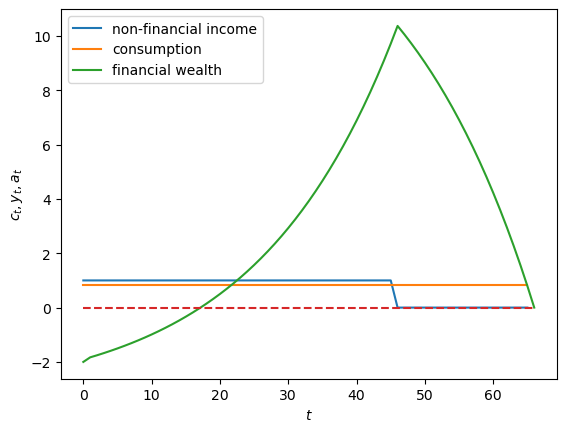

In [48]:
# Sequence Length
T = cs_model.T

plt.plot(range(T+1), y_seq, label='non-financial income') #exogenus income of 1 for 46 years then 0 
plt.plot(range(T+1), c_seq, label='consumption')
plt.plot(range(T+2), a_seq, label='financial wealth') #have to save a lot during working years to run assets down to 0 by death, saving negative is borrowing
plt.plot(range(T+2), np.zeros(T+2), '--')

plt.legend()
plt.xlabel(r'$t$')
plt.ylabel(r'$c_t,y_t,a_t$')
plt.show()

This consumption could fluctuate with unexpected unemployment, access to credit and borrowing, etc..

Note that $ a_{T+1} = 0 $, as anticipated.

We can  evaluate  welfare criterion [(2)](#equation-welfare)

In [56]:
def welfare(model, c_seq):
    β_seq, g1, g2 = model.β_seq, model.g1, model.g2

    u_seq = g1 * c_seq - g2/2 * c_seq**2
    return β_seq @ u_seq #beta vector times utility vector

print('Welfare:', welfare(cs_model, c_seq))

Welfare: 13.285050962183433


### Experiments

In this section we decribe  how a  consumption sequence would optimally respond to different sequences of non-financial income.

First we create  a function `plot_cs` that generate graphs for different instances of the  consumption smoothing model `cs_model`.

This will  help us avoid rewriting code to plot outcomes for different non-financial income sequences.

In [59]:
def plot_cs(model,    # consumption smoothing model      
            a0,       # initial financial wealth
            y_seq     # non-financial income process
           ):
    
    # Compute optimal consumption
    c_seq, a_seq, h0 = compute_optimal(model, a0, y_seq)
    
    # Sequence length
    T = cs_model.T
    
    # Generate plot
    plt.plot(range(T+1), y_seq, label='non-financial income')
    plt.plot(range(T+1), c_seq, label='consumption')
    plt.plot(range(T+2), a_seq, label='financial wealth')
    plt.plot(range(T+2), np.zeros(T+2), '--')
    
    plt.legend()
    plt.xlabel(r'$t$')
    plt.ylabel(r'$c_t,y_t,a_t$')
    plt.show()

In the experiments below, focus on how consumption and financial asset sequences vary accross different sequences for non-financial income.

#### Experiment 1: one-time gain/loss

We first assume a one-time windfall of $ W_0 $ in year 21 of the income sequence $ y $.

We’ll make $ W_0 $ big - positive to indicate a one-time windfall, and negative to indicate a one-time “disaster”.

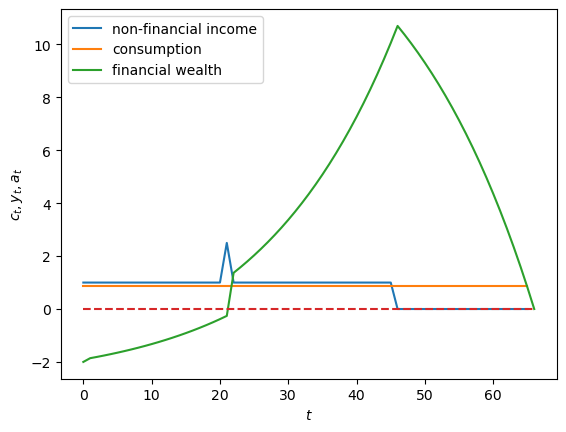

In [67]:
# Windfall W_0 = 2.5
y_seq_pos = np.concatenate([np.ones(21), np.array([2.5]), np.ones(24), np.zeros(20)])

plot_cs(cs_model, a0, y_seq_pos)

#feeding in blue, uptick windfall. shifts consumption up bc overall lifetime income inc in one period, effect c inc in every period

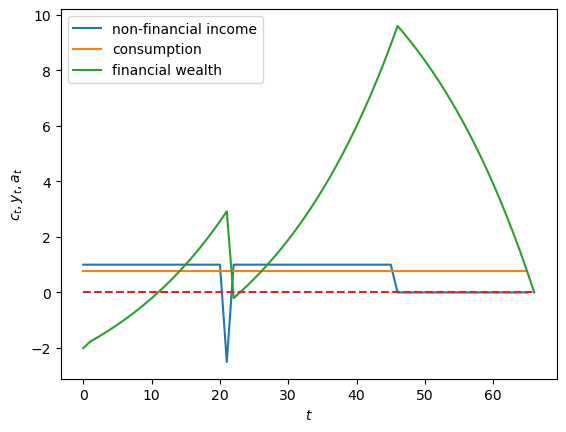

In [69]:
# Disaster W_0 = -2.5
y_seq_neg = np.concatenate([np.ones(21), np.array([-2.5]), np.ones(24), np.zeros(20)])

plot_cs(cs_model, a0, y_seq_neg)

#opposite effect on income and smoothing consumption

#### Experiment 2: permanent wage gain/loss

Now we assume a permanent  increase in income of $ W $ in year 21 of the $ y $-sequence.

Again we can study positive and negative cases

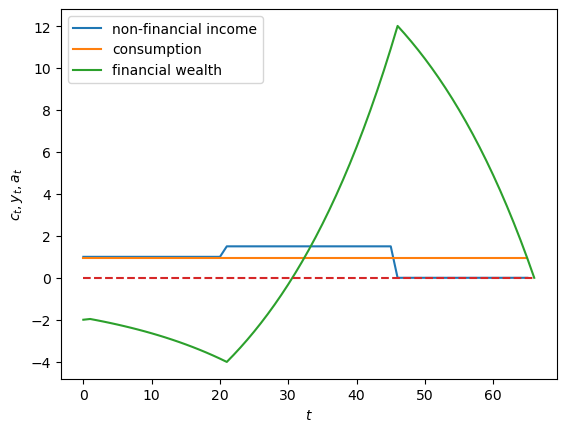

In [71]:
# Positive permanent income change W = 0.5 when t >= 21
y_seq_pos = np.concatenate(
    [np.ones(21), 1.5*np.ones(25), np.zeros(20)])

plot_cs(cs_model, a0, y_seq_pos)

#no longer saving before income inc, borrowing more and more and save once higher income until retire 

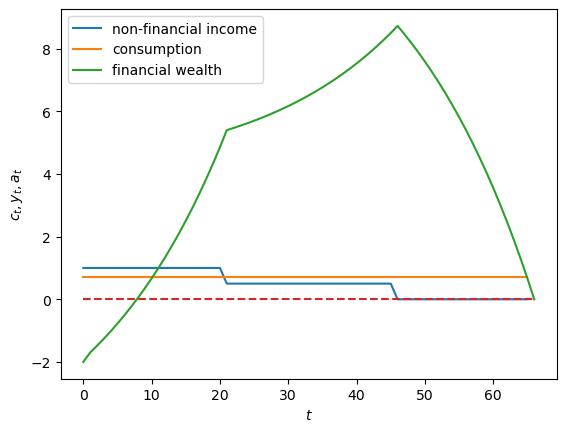

In [73]:
# Negative permanent income change W = -0.5 when t >= 21
y_seq_neg = np.concatenate(
    [np.ones(21), .5*np.ones(25), np.zeros(20)])

plot_cs(cs_model, a0, y_seq_neg)

#save less once inc permamanent dec, slope dec of savings.

#### Experiment 3: a late starter

Now we simulate a $ y $ sequence in which a person gets zero for 26 years, and then works and gets 1 for the last 40 years of life (a “late starter”)

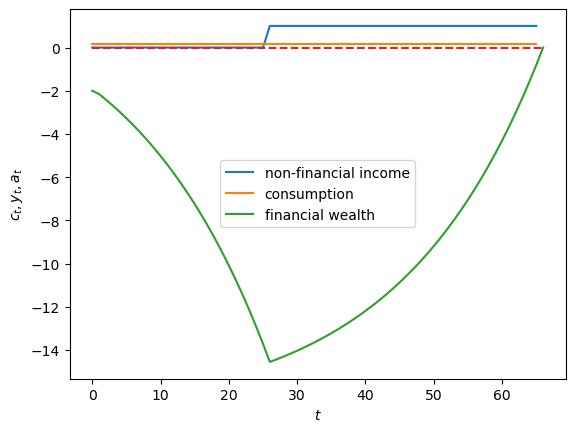

In [12]:
# Late starter
y_seq_late = np.concatenate(
    [np.zeros(26), np.ones(40)])

plot_cs(cs_model, a0, y_seq_late)

#### Experiment 4: geometric earner

Now we simulate a geometric $ y $ sequence in which a person gets $ y_t = \lambda^t y_0 $ in first 46 years.

We first experiment with $ \lambda = 1.05 $

*income growing exponentially over life*

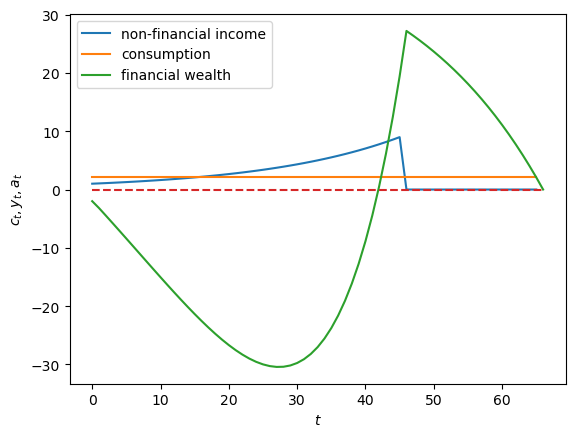

In [76]:
# Geometric earner parameters where λ = 1.05
λ = 1.05
y_0 = 1
t_max = 46

# Generate geometric y sequence
geo_seq = λ ** np.arange(t_max) * y_0 
y_seq_geo = np.concatenate(
            [geo_seq, np.zeros(20)])

plot_cs(cs_model, a0, y_seq_geo)

#borrow a lot in early years, once income becomes higher and higher save and then spend a lot after retire 

Now we show the behavior when $ \lambda = 0.95 $

*means exponentially dec in income over life*

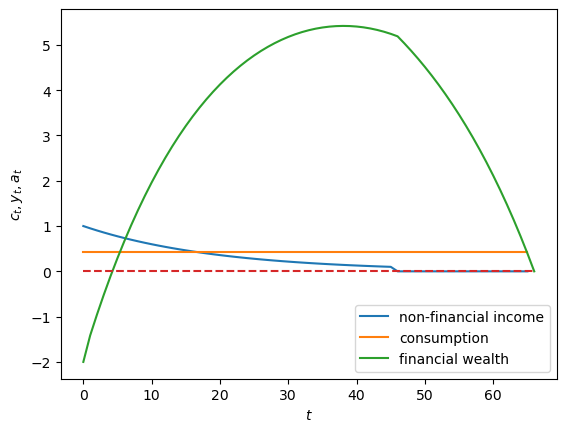

In [79]:
λ = 0.95

geo_seq = λ ** np.arange(t_max) * y_0 
y_seq_geo = np.concatenate(
            [geo_seq, np.zeros(20)])

plot_cs(cs_model, a0, y_seq_geo)

#save a lot bc know income will dec over life 

What happens when $ \lambda $ is negative

*income profile that is oscilating btwn pos and neg, lots of volatility in income stream, doesnt mean uncertainty so can still plan saving and consumption so consumption still flat over life*

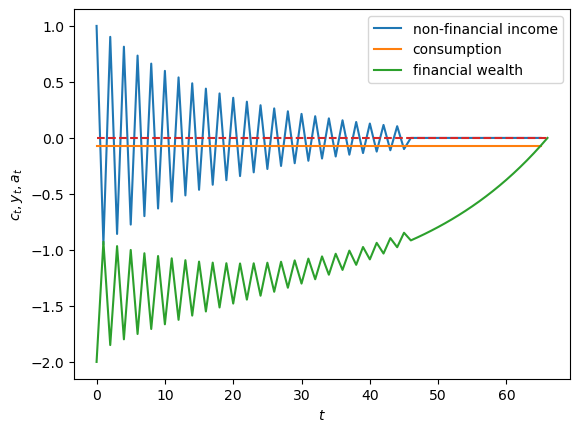

In [83]:
λ = -0.95

geo_seq = λ ** np.arange(t_max) * y_0 
y_seq_geo = np.concatenate(
            [geo_seq, np.zeros(20)])

plot_cs(cs_model, a0, y_seq_geo)

## Why is constant consumption optimal?

Recall our welfare criterion:

$$W = \sum_{t=0}^T \beta^t (g_1 c_t - \frac{g_2}{2} c_t^2 ). $$

We have to maximize $W$ subject to the sequence of budget constraints:
$$
a_{t+1} = R (a_t+ y_t - c_t), \quad t =0. 1, \ldots T 
$$

We can do this by replacing $c_t$ in the welfare criterion to arrive at an unconstrained maximization problem that is easier to solve:

$$W = \sum_{t=0}^T \beta^t (g_1 \underbrace{(a_t + y_t - R^{-1}a_{t+1})}_{c_t} - \frac{g_2}{2} \underbrace{(a_t + y_t - R^{-1}a_{t+1})^2}_{c_t^2} ). $$

If we take the derivative with respect to $a_{t+1}$, set this equal to zero (which has to be satisfied in order to be a maximum), and impose $\beta R = 1$, we get after some rearranging (will be done in class):

$$c_t = c_{t+1},$$

which confirms that optimal consumption is constant. 

* in class on board rewrite bc and plug in objective into w s=t, plug in show up in current period and past period , zooming into w to see where $a_s$ shows up 

take derivative of w with respect to $a_s$

=$\beta^s(g_1-g_2(a_s+y_s-R^{-1}a_{s+1}) + \beta^{s-1}(-R^{-1}-g_2(a......))$

set that equal to zero and solve for s $=0$ , FOC

$g_2(C_s)$ in second term is $g_2(C_{s-1})$   - makes easier to solve

* $\beta$$R =1$

* so $\beta=R^{-1}$ inverse 

* once solve get $C_s=C_{s-1}$

### example of perfect consumption breaking

* uncertainty
* access to credit markets

two period model t=0, 1
$y_0$ is known as $t=0$

$y_t$ is not known 

$y_t$ = $y^H$ with prob P 
    
$y_t$ = $y^L$ with prob (1-p)

consumption: 
$C_1=y_1 + a_1$  income +save ,,, but dont know $y_1$ bc it could be high (H) or low (L)

$C_0=R^{-1}a_1+y_0$  ,, save + start income 

only have 1 choice which is save in period 1, choice happens in period 0 ($a_1$)

max $g_1C_0-{(g_2)/2}(c_0^2) + \beta[(function( pH)) +(1-pL)(function...)]$

* choose $a_1$ under uncertainty
* take derivative with respect to $a_1$

$-R^{-1}g_1-g_2(y_0-R^{-1}a_1)(-R^{-1}+\beta[p(g_1-g_2)(y^H+a_1)+(1-p)(g_1-g_2)(y^L+a_2))]$

$C_0=pC^H_1+(1-p)C^L_1$

$C_0=E_0C_1$  consumption smoothing IN TERMS on expectations, on average still smoothing consumption

## Appendix: solving difference equations with linear algebra

We have used linear algebra to solve a consumption smoothing model.

The same tools from linear algebra – matrix multiplication and matrix inversion – can be used  to study many other dynamic models.

We’ll conclude this lecture by giving a couple of examples.

We’ll describe a useful way of representing and “solving” linear difference equations.

To generate some $ y $ vectors, we’ll just write down a linear difference equation
with appropriate initial conditions and then   use linear algebra to solve it.

### First-order difference equation

We’ll start with a first-order linear difference equation for $ \{y_t\}_{t=0}^T $:

$$
y_{t} = \lambda y_{t-1}, \quad t = 1, 2, \ldots, T
$$

where  $ y_0 $ is a given  initial condition.

We can cast this set of $ T $ equations as a single  matrix equation


<a id='equation-eq-first-order-lin-diff'></a>
$$
\begin{bmatrix} 
1 & 0 & 0 & \cdots & 0 & 0 \cr
-\lambda & 1 & 0 & \cdots & 0 & 0 \cr
0 & -\lambda & 1 & \cdots & 0 & 0 \cr
 \vdots & \vdots & \vdots & \cdots & \vdots & \vdots \cr
0 & 0 & 0 & \cdots & -\lambda & 1 
\end{bmatrix} 
\begin{bmatrix}
y_1 \cr y_2 \cr y_3 \cr \vdots \cr y_T 
\end{bmatrix}
= 
\begin{bmatrix} 
\lambda y_0 \cr 0 \cr 0 \cr \vdots \cr 0 
\end{bmatrix} \tag{5}
$$

Multiplying both sides of [(5)](#equation-eq-first-order-lin-diff)  by the  inverse of the matrix on the left provides the solution


<a id='equation-fst-ord-inverse'></a>
$$
\begin{bmatrix} 
y_1 \cr y_2 \cr y_3 \cr \vdots \cr y_T 
\end{bmatrix} 
= 
\begin{bmatrix} 
1 & 0 & 0 & \cdots & 0 & 0 \cr
\lambda & 1 & 0 & \cdots & 0 & 0 \cr
\lambda^2 & \lambda & 1 & \cdots & 0 & 0 \cr
 \vdots & \vdots & \vdots & \cdots & \vdots & \vdots \cr
\lambda^{T-1} & \lambda^{T-2} & \lambda^{T-3} & \cdots & \lambda & 1 
\end{bmatrix}
\begin{bmatrix} 
\lambda y_0 \cr 0 \cr 0 \cr \vdots \cr 0 
\end{bmatrix} \tag{6}
$$

(Note: you don't have to be able to solve the inverse by hand. You can use Python to do this.)

### Exercise to do in class

To get [(6)](#equation-fst-ord-inverse), we multiplied both sides of  [(5)](#equation-eq-first-order-lin-diff) by  the inverse of the matrix $ A $. Please confirm that

$$
\begin{bmatrix} 
1 & 0 & 0 & \cdots & 0 & 0 \cr
\lambda & 1 & 0 & \cdots & 0 & 0 \cr
\lambda^2 & \lambda & 1 & \cdots & 0 & 0 \cr
 \vdots & \vdots & \vdots & \cdots & \vdots & \vdots \cr
\lambda^{T-1} & \lambda^{T-2} & \lambda^{T-3} & \cdots & \lambda & 1 
\end{bmatrix}
$$

is the inverse of $ A $ using Python and check by hand that $ A A^{-1} = I $

### Second order difference equation

A second-order linear difference equation for $ \{y_t\}_{t=0}^T $ is

$$
y_{t} = \lambda_1 y_{t-1} + \lambda_2 y_{t-2}, \quad t = 1, 2, \ldots, T
$$

where now $ y_0 $ and $ y_{-1} $ are two given initial equations determined outside the model.

As we did with the first-order difference equation, we can cast this set of $ T $ equations as a single matrix equation

$$
\begin{bmatrix} 
1 & 0 & 0 & \cdots & 0 & 0 & 0 \cr
-\lambda_1 & 1 & 0 & \cdots & 0 & 0 & 0 \cr
-\lambda_2 & -\lambda_1 & 1 & \cdots & 0 & 0 & 0 \cr
 \vdots & \vdots & \vdots & \cdots & \vdots & \vdots \cr
0 & 0 & 0 & \cdots & -\lambda_2 & -\lambda_1 & 1 
\end{bmatrix} 
\begin{bmatrix} 
y_1 \cr y_2 \cr y_3 \cr \vdots \cr y_T 
\end{bmatrix}
= 
\begin{bmatrix} 
\lambda_1 y_0 + \lambda_2 y_{-1} \cr \lambda_2 y_0 \cr 0 \cr \vdots \cr 0 
\end{bmatrix}
$$

Multiplying both sides by  inverse of the matrix on the left again provides the solution. It's a good exercise to do this using Python.